In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

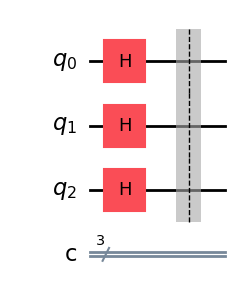

In [61]:
num_qubits = 3
num_classical_bits = 3


qc = QuantumCircuit(num_qubits, num_classical_bits)


qc.h(range(num_qubits))


qc.barrier()


qc.draw(output='mpl')


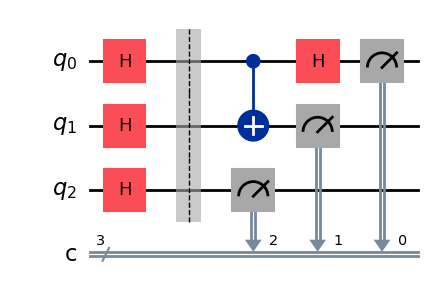

In [62]:

qc.cx(0, 1)


qc.h(0)


qc.measure(range(num_qubits), range(num_classical_bits))


qc.draw(output='mpl')


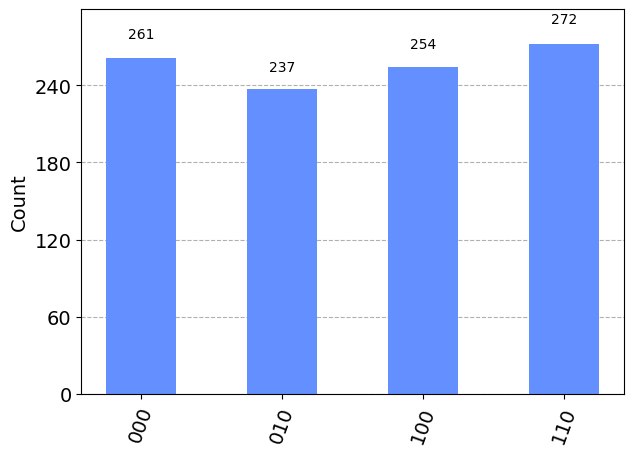

In [63]:

backend = Aer.get_backend('qasm_simulator')


job = backend.run(qc)


result = job.result()


counts = result.get_counts()
plot_histogram(counts)


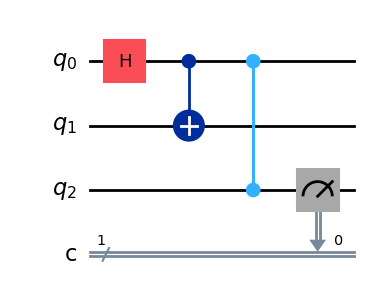

In [64]:

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector as sv, Operator as op
from qiskit.visualization import plot_bloch_multivector as pbm, plot_histogram as ph, plot_state_qsphere as psq
from numpy import sqrt
from qiskit.visualization import array_to_latex
from math import pi

qc = QuantumCircuit(3, 1)

qc.h(0)

qc.cx(0, 1)

qc.cz(0, 2)

qc.measure(2, 0)

qc.draw(output='mpl')


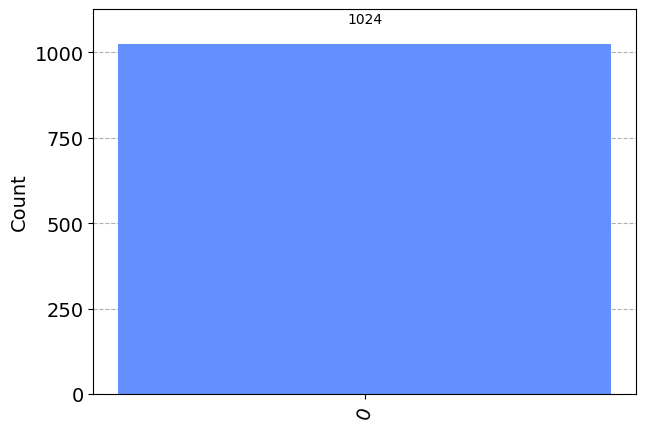

In [65]:

simulator = AerSimulator()


job = simulator.run(qc)


result = job.result()


counts = result.get_counts()

ph(counts)


In [66]:

total_counts = sum(counts.values())
probabilities = {state: count / total_counts for state, count in counts.items()}

# Print the probabilities
print("Probabilities:")
for state, prob in probabilities.items():
    print(f"|{state}>: {prob:.4f}")


Probabilities:
|0>: 1.0000


In [67]:

from qiskit.visualization import circuit_drawer


circuit_drawer(qc)


┌───┐           
q_0: ┤ H ├──■───■────
     └───┘┌─┴─┐ │    
q_1: ─────┤ X ├─┼────
          └───┘ │ ┌─┐
q_2: ───────────■─┤M├
                  └╥┘
c: 1/══════════════╩═
                   0

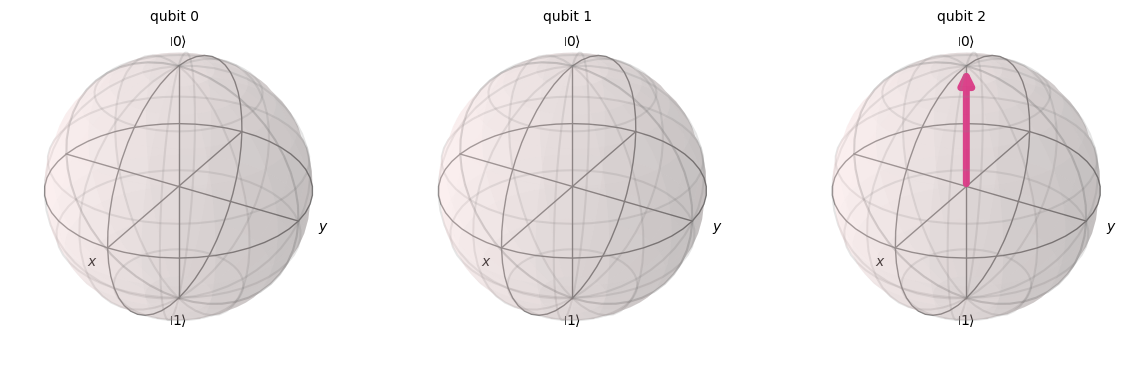

In [69]:

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector as sv
from qiskit.visualization import plot_bloch_multivector as pbm

qc_no_measure = QuantumCircuit(qc.num_qubits)
for instr, qargs, cargs in qc.data:
    if instr.name != 'measure':
        qc_no_measure.append(instr, qargs, cargs)

final_statevector = sv.from_instruction(qc_no_measure)

pbm(final_statevector)


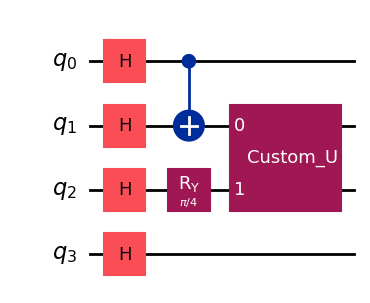

In [70]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
import numpy as np

custom_unitary_matrix = np.array([[1, 0, 0, 0],
                                 [0, 1, 0, 0],
                                 [0, 0, 1, 0],
                                 [0, 0, 0, -1]])

custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label='Custom_U')

num_qubits = 4
qc = QuantumCircuit(num_qubits)

qc.h(range(num_qubits))  
qc.cx(0, 1)  
qc.ry(np.pi/4, 2)  

qc.append(custom_unitary_gate, [1, 2])


qc.draw(output='mpl')


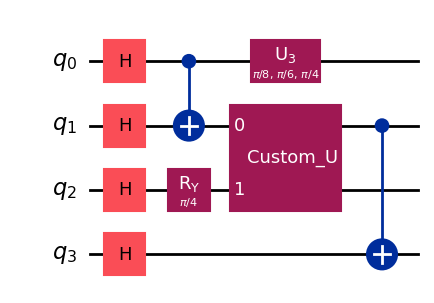

In [11]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate, U3Gate
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

custom_unitary_matrix = np.array([[1, 0, 0, 0],
                                 [0, 1, 0, 0],
                                 [0, 0, 1, 0],
                                 [0, 0, 0, -1]])

custom_unitary_gate = UnitaryGate(custom_unitary_matrix, label='Custom_U')

# Define the quantum circuit
num_qubits = 4
qc = QuantumCircuit(num_qubits)

# Add gates to the circuit
qc.h(range(num_qubits))  # Apply Hadamard gates to all qubits
qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
qc.ry(np.pi/4, 2)  # Apply parametrized Y rotation gate to qubit 2

# Apply the custom unitary gate to specific qubits (e.g., qubits 1 and 2)
qc.append(custom_unitary_gate, [1, 2])

# Apply additional gates
qc.cx(1, 3)  # Apply CNOT gate between qubit 1 and qubit 3

# Option 2: Using the U3Gate class
u3_gate = U3Gate(theta=np.pi/8, phi=np.pi/6, lam=np.pi/4)
qc.append(u3_gate, [0])  # Apply U3 gate with specific parameters to qubit 0

# Visualize the quantum circuit
qc.draw(output='mpl')


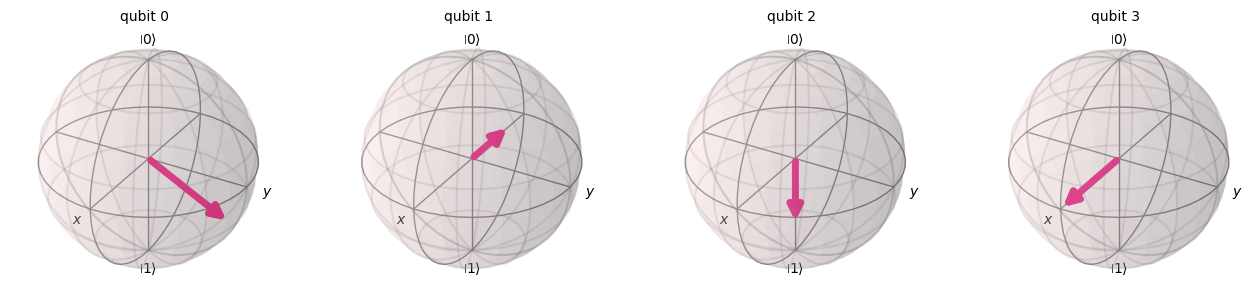

In [12]:
# Get the final statevector
final_statevector = Statevector.from_instruction(qc)

# Visualize the final statevector using a Bloch sphere
plot_bloch_multivector(final_statevector)


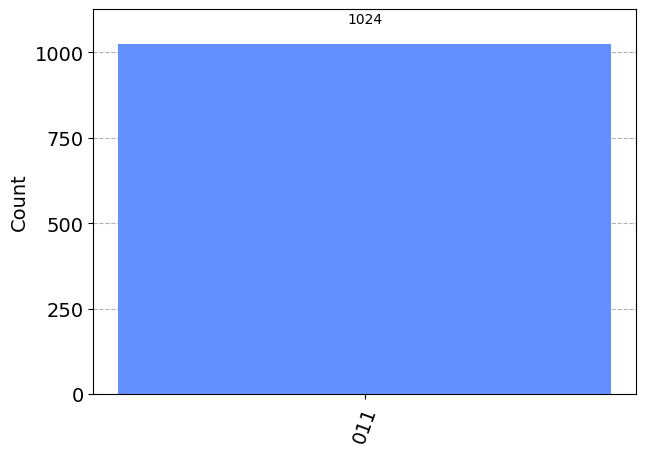

In [18]:
from qiskit import QuantumCircuit as QC, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector as sv, Operator as op
from qiskit.visualization import plot_bloch_multivector as pbm, plot_histogram as ph, plot_state_qsphere as psq
from numpy import sqrt
from qiskit.visualization import array_to_latex
from math import pi

# Choose the Aer simulator backend
air = AerSimulator()

# Execute the circuit on the simulator backend
job = air.run(qc)

# Get the result
result = job.result()

# Get the counts
counts = result.get_counts()

# Plot the histogram of measurement outcomes
ph(counts)


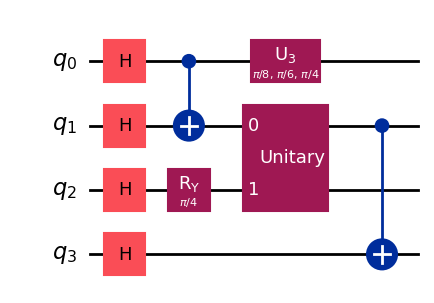

In [20]:
from qiskit import QuantumCircuit as QC, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector as sv, Operator as op
from qiskit.visualization import plot_bloch_multivector as pbm, plot_histogram as ph, plot_state_qsphere as psq
from numpy import sqrt
from qiskit.visualization import array_to_latex
from math import pi
from qiskit.circuit.library import U3Gate

# Define the custom unitary gate matrix
custom_unitary_matrix = np.array([[1, 0, 0, 0],
                                  [0, 1, 0, 0],
                                  [0, 0, 1, 0],
                                  [0, 0, 0, -1]])

# Create the custom unitary gate
custom_unitary_gate = op(custom_unitary_matrix)

# Define the quantum circuit
num_qubits = 4
qc = QC(num_qubits)

# Add gates to the circuit
qc.h(range(num_qubits))  # Apply Hadamard gates to all qubits
qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
qc.ry(pi/4, 2)  # Apply Y rotation gate to qubit 2
qc.append(custom_unitary_gate, [1, 2])  # Apply the custom unitary gate to qubits 1 and 2
qc.cx(1, 3)  # Apply CNOT gate between qubit 1 and qubit 3

# Define the U3Gate with specific parameters
u3_gate = U3Gate(theta=pi/8, phi=pi/6, lam=pi/4)

# Apply the U3 gate to qubit 0
qc.append(u3_gate, [0])

# Visualize the quantum circuit
qc.draw(output='mpl')


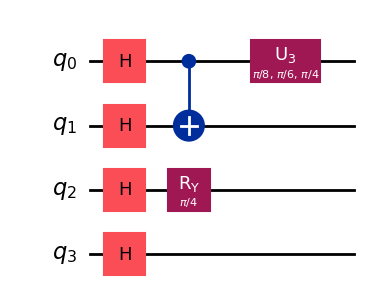

In [28]:
from qiskit import QuantumCircuit as QC, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector as sv, Operator as op
from qiskit.visualization import plot_bloch_multivector as pbm, plot_histogram as ph, plot_state_qsphere as psq
from numpy import sqrt
from qiskit.visualization import array_to_latex
from math import pi
from qiskit.circuit.library import U3Gate

# Define the quantum circuit
num_qubits = 4
qc = QC(num_qubits)

# Add gates to the circuit
qc.h(range(num_qubits))  # Apply Hadamard gates to all qubits
qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
qc.ry(pi/4, 2)  # Apply Y rotation gate to qubit 2

# Define U3 gate parameters
theta = pi / 8
phi = pi / 6
lam = pi / 4

# Create a U3 gate object with the specified parameters
u3_gate = U3Gate(theta=theta, phi=phi, lam=lam)

# Apply the U3 gate to qubit 0
qc.append(u3_gate, [0])

# Visualize the quantum circuit
qc.draw(output='mpl')


{'0011': 41, '1100': 78, '0111': 145, '0100': 91, '1101': 126, '1000': 27, '0000': 13, '0110': 70, '0101': 137, '1111': 130, '1011': 22, '0001': 21, '1010': 17, '1110': 76, '0010': 14, '1001': 16}


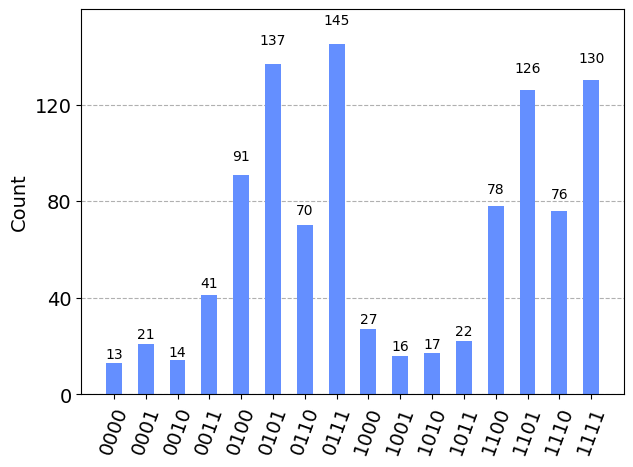

In [31]:
from qiskit import QuantumCircuit as QC, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.circuit.library import U3Gate
from qiskit.quantum_info import Statevector as sv, Operator as op
from qiskit.visualization import plot_bloch_multivector as pbm, plot_histogram as ph, plot_state_qsphere as psq
from numpy import sqrt
from qiskit.visualization import array_to_latex
from math import pi

# Define the quantum circuit
num_qubits = 4
qc = QC(num_qubits)

# Add gates to the circuit
qc.h(range(num_qubits))  # Apply Hadamard gates to all qubits
qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
qc.ry(pi/4, 2)  # Apply Y rotation gate to qubit 2
qc.append(custom_unitary_gate, [1, 2])  # Apply the custom unitary gate to qubits 1 and 2
qc.cx(1, 3)  # Apply CNOT gate between qubit 1 and qubit 3
qc.u(pi/8, pi/6, pi/4, 0)  # Apply U gate with specific parameters to qubit 0

# Add measurement instructions
qc.measure_all()

# Create an AerSimulator instance
air = AerSimulator()

# Execute the circuit on the AerSimulator backend and get the result
result = air.run(qc).result()

# Get the counts (measurement outcomes)
counts = result.get_counts()

# Print the counts
print(counts)

# Plot the histogram of measurement outcomes
ph(counts)


Probability of the bomb not exploding: 37.6953125 %


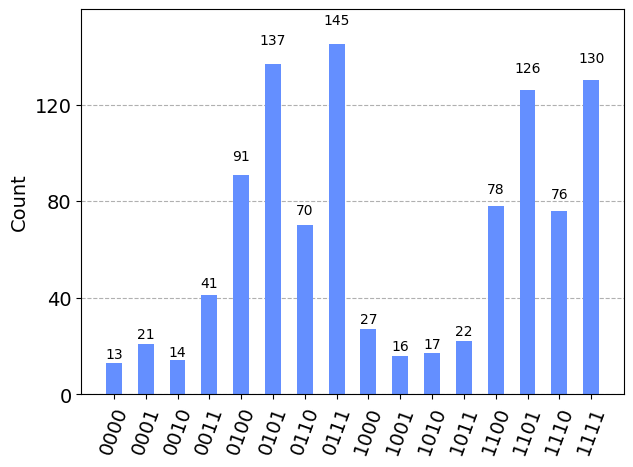

In [32]:
# Get the total number of shots
total_shots = sum(counts.values())

# Initialize variables to store counts for the bomb not exploding and the total counts
non_exploded_counts = 0

# Loop through the counts to calculate the counts for the bomb not exploding
for outcome, count in counts.items():
    if outcome[-1] == '0':  # Check if the ancilla qubit is in the |0⟩ state
        non_exploded_counts += count

# Calculate the probability percentage
probability_percentage = (non_exploded_counts / total_shots) * 100

# Print the probability percentage
print("Probability of the bomb not exploding:", probability_percentage, "%")

# Plot the histogram of measurement outcomes
ph(counts)


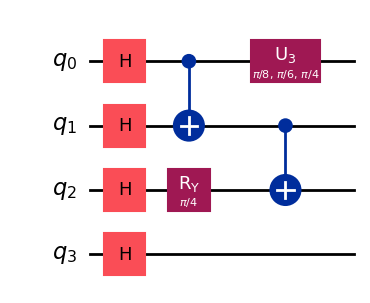

In [35]:
from qiskit import QuantumCircuit as QC, ClassicalRegister
from qiskit.circuit.library import U3Gate
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector as sv, Operator as op
from qiskit.visualization import plot_bloch_multivector as pbm, plot_histogram as ph, plot_state_qsphere as psq
from numpy import sqrt
from qiskit.visualization import array_to_latex
from math import pi

# Create an AerSimulator instance
air = AerSimulator()

# Define the quantum circuit
num_qubits = 4
qc = QC(num_qubits)

# Add gates to the circuit to increase interaction-free measurement probability
# Experiment with different gate sequences and parameters
qc.h(range(num_qubits))  # Apply Hadamard gates to all qubits
qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
qc.ry(pi/4, 2)  # Apply Y rotation gate to qubit 2
qc.cx(1, 2)  # Apply CNOT gate between qubit 1 and qubit 2
qc.append(U3Gate(pi/8, pi/6, pi/4), [0])  # Apply U3 gate with specific parameters to qubit 0

# Visualize the quantum circuit
qc.draw(output='mpl')


{'0100': 113, '1101': 123, '0000': 22, '0101': 92, '1110': 20, '0011': 112, '1100': 101, '1011': 123, '0001': 13, '1010': 109, '0010': 110, '0111': 28, '1001': 17, '1111': 16, '0110': 12, '1000': 13}


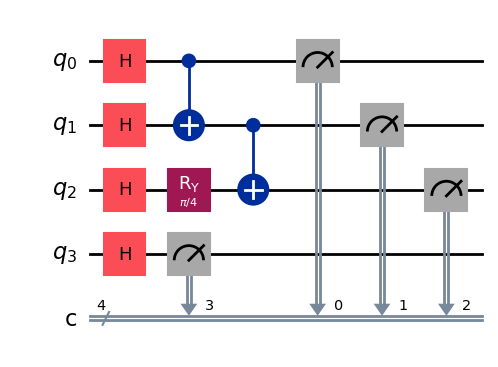

In [39]:
# Define the classical register to store measurement results
cr = ClassicalRegister(num_qubits)

# Define the quantum circuit with the classical register
qc = QC(num_qubits, num_qubits)

# Add gates to the circuit
qc.h(range(num_qubits))  # Apply Hadamard gates to all qubits
qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
qc.ry(pi/4, 2)  # Apply Y rotation gate to qubit 2
qc.cx(1, 2)  # Apply CNOT gate between qubit 1 and qubit 2

# Add measurement instructions to the circuit
qc.measure(range(num_qubits), range(num_qubits))

# Create an AerSimulator instance
air = AerSimulator()

# Execute the circuit on the AerSimulator backend and get the result
result = air.run(qc).result()

# Get the counts (measurement outcomes)
counts = result.get_counts()

# Print the counts
print(counts)

# Plot the histogram of measurement outcomes
ph(counts)

# Visualize the quantum circuit
qc.draw(output='mpl')


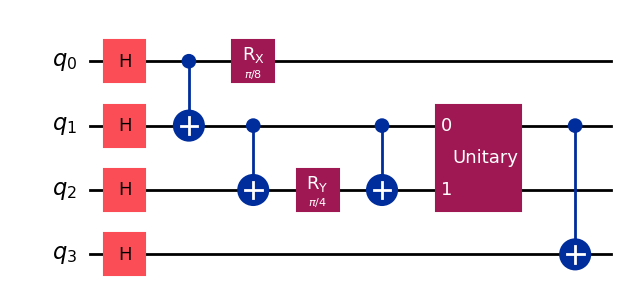

In [44]:
# Define the quantum circuit
num_qubits = 4
qc = QC(num_qubits)

# Add gates to the circuit
qc.h(range(num_qubits))  # Apply Hadamard gates to all qubits
qc.cx(0, 1)  # Apply CNOT gate between qubit 0 and qubit 1
qc.cx(1, 2)  # Apply CNOT gate between qubit 1 and qubit 2
qc.ry(pi/4, 2)  # Apply Y rotation gate to qubit 2
qc.cx(1, 2)  # Apply CNOT gate between qubit 1 and qubit 2
qc.append(custom_unitary_gate, [1, 2])  # Apply the custom unitary gate to qubits 1 and 2
qc.cx(1, 3)  # Apply CNOT gate between qubit 1 and qubit 3
qc.rx(pi/8, 0)  # Apply X rotation gate with specific parameter to qubit 0

# Visualize the quantum circuit
qc.draw(output='mpl')


In [46]:
# Calculate the total number of shots (experiments)
total_shots = sum(counts.values())

# Iterate over each outcome and calculate its probability
probabilities = {outcome: count / total_shots for outcome, count in counts.items()}

# Print the probabilities
for outcome, probability in probabilities.items():
    print(f"Probability of outcome '{outcome}': {probability * 100:.2f}%")


Probability of outcome '0100': 11.04%
Probability of outcome '1101': 12.01%
Probability of outcome '0000': 2.15%
Probability of outcome '0101': 8.98%
Probability of outcome '1110': 1.95%
Probability of outcome '0011': 10.94%
Probability of outcome '1100': 9.86%
Probability of outcome '1011': 12.01%
Probability of outcome '0001': 1.27%
Probability of outcome '1010': 10.64%
Probability of outcome '0010': 10.74%
Probability of outcome '0111': 2.73%
Probability of outcome '1001': 1.66%
Probability of outcome '1111': 1.56%
Probability of outcome '0110': 1.17%
Probability of outcome '1000': 1.27%


Probability of outcome '0100': 11.04%
Probability of outcome '1101': 12.01%
Probability of outcome '0000': 2.15%
Probability of outcome '0101': 8.98%
Probability of outcome '1110': 1.95%
Probability of outcome '0011': 10.94%
Probability of outcome '1100': 9.86%
Probability of outcome '1011': 12.01%
Probability of outcome '0001': 1.27%
Probability of outcome '1010': 10.64%
Probability of outcome '0010': 10.74%
Probability of outcome '0111': 2.73%
Probability of outcome '1001': 1.66%
Probability of outcome '1111': 1.56%
Probability of outcome '0110': 1.17%
Probability of outcome '1000': 1.27%


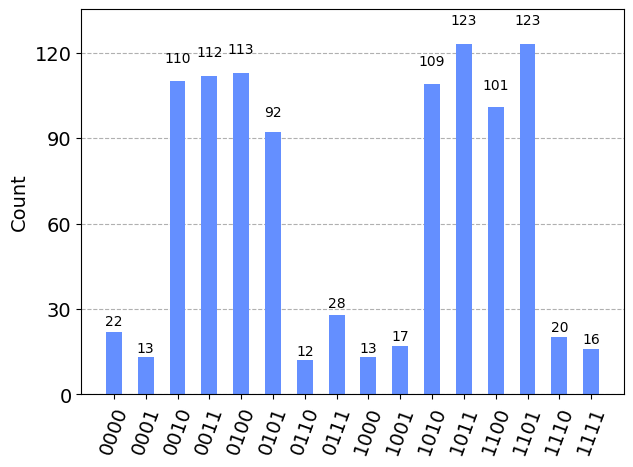

In [47]:
# Calculate the total probability
total_probability = sum(counts.values())

# Calculate the probabilities of each outcome and print them
for outcome, count in counts.items():
    probability = count / total_probability
    print(f"Probability of outcome '{outcome}': {probability:.2%}")

# Plot the histogram of measurement outcomes
ph(counts)


{'11100101': 3, '01000110': 4, '10101001': 43, '10011010': 31, '10001011': 1, '01010101': 35, '01101101': 3, '00010001': 1, '11010110': 10, '10010001': 7, '10010111': 5, '01110101': 6, '11010000': 1, '01101001': 29, '11101010': 3, '10010101': 34, '01001001': 8, '10100110': 31, '01000001': 2, '01111101': 1, '11011010': 10, '01011001': 32, '00010111': 2, '00010110': 9, '01101100': 1, '01001000': 1, '00111001': 1, '10100111': 4, '01010110': 35, '01100101': 33, '10110100': 1, '01011010': 32, '10000110': 13, '00111101': 2, '11010101': 4, '01001110': 2, '01110000': 1, '01111010': 6, '10011100': 2, '11010001': 3, '10010110': 33, '01100100': 9, '10000001': 2, '10011001': 33, '10101010': 35, '00101101': 1, '01011011': 8, '10110111': 1, '10000101': 6, '00100101': 8, '01100110': 38, '01100111': 5, '10101101': 3, '01011110': 2, '01101010': 36, '01111011': 1, '01000111': 1, '11100110': 5, '01000101': 8, '10100101': 24, '10111101': 1, '01010001': 8, '10111010': 10, '01010100': 5, '10000100': 2, '101

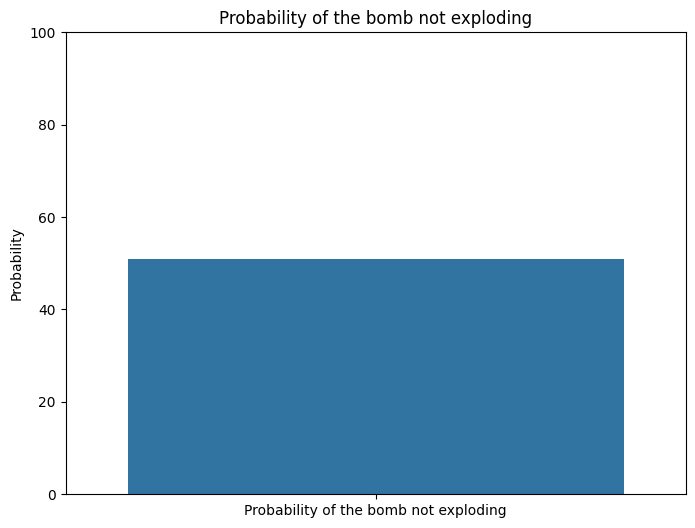

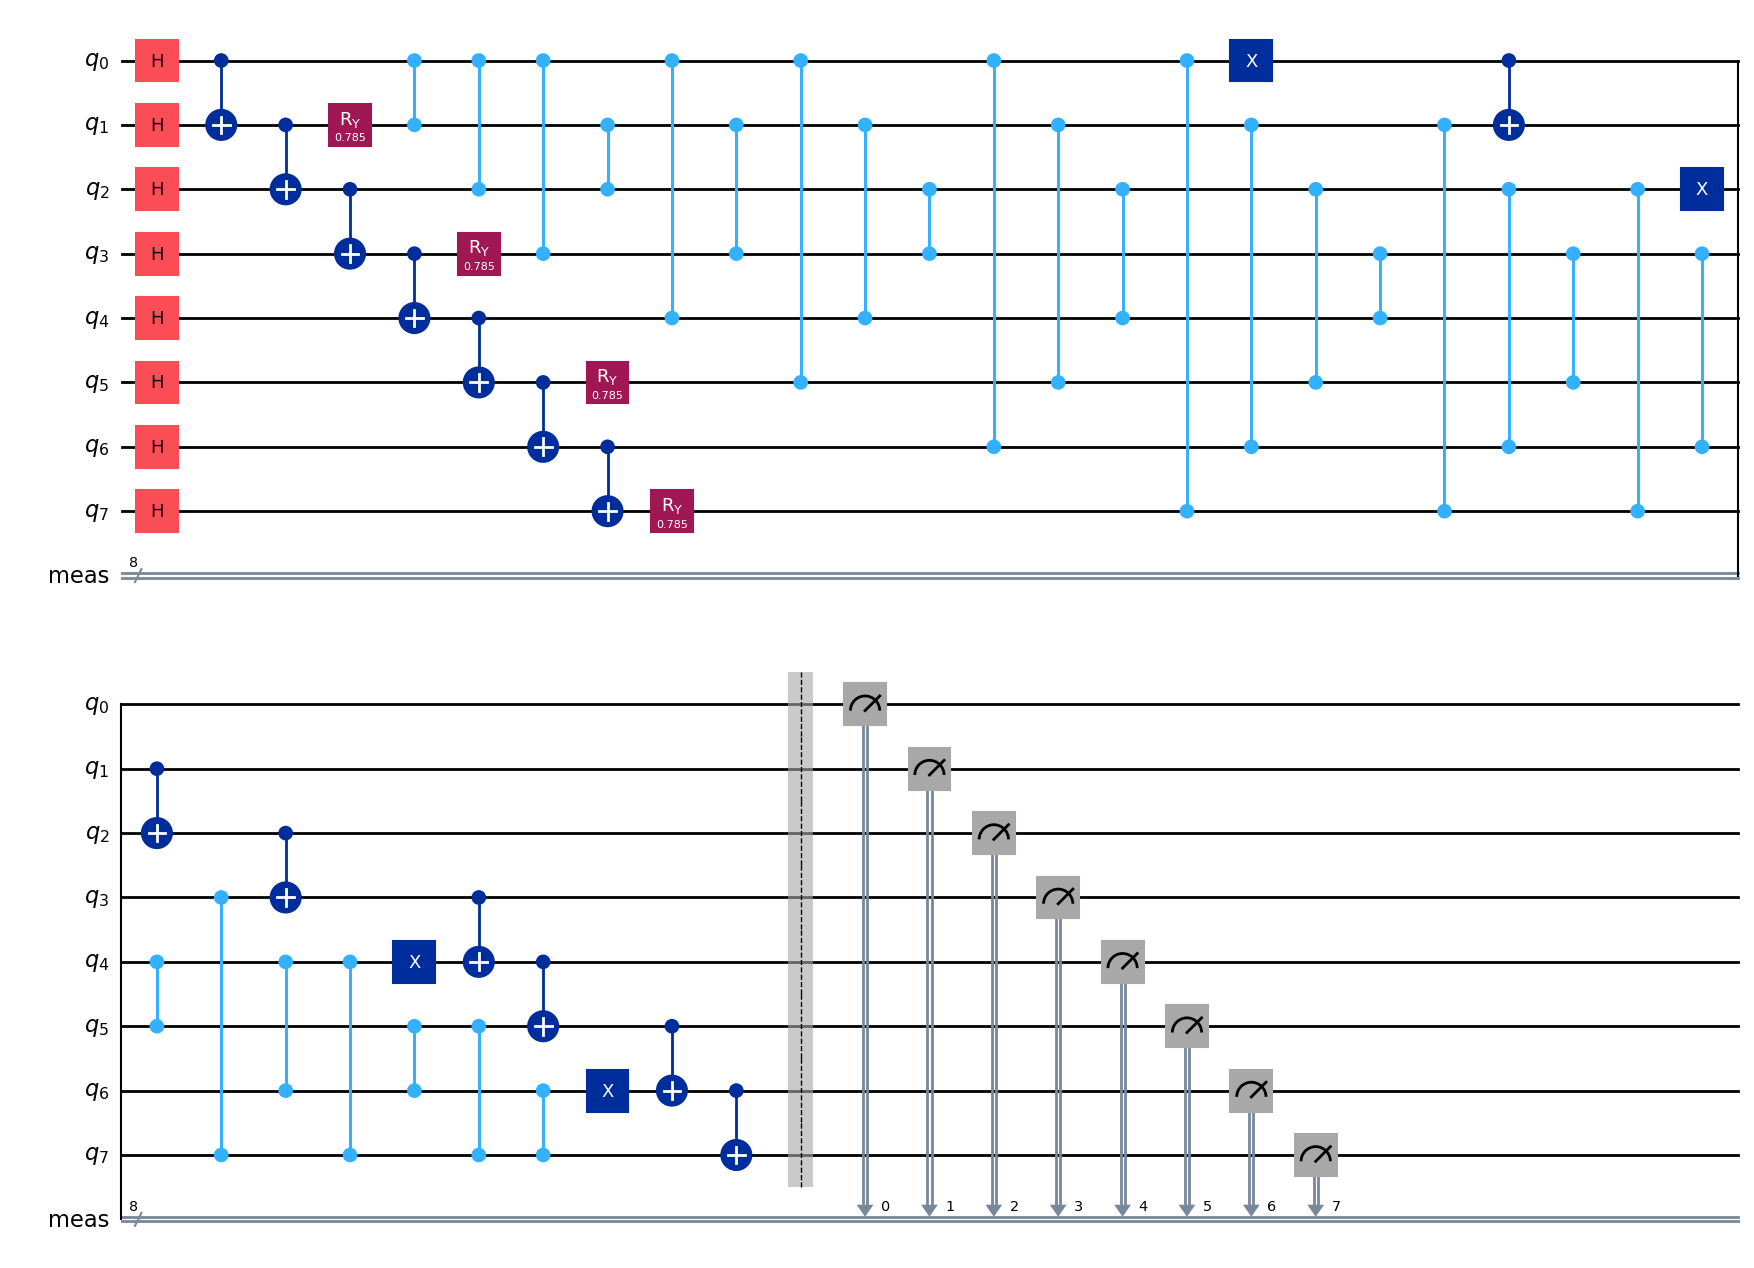

In [58]:
from qiskit import QuantumCircuit as QC, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector as sv, Operator as op
from qiskit.visualization import plot_bloch_multivector as pbm, plot_histogram as ph, plot_state_qsphere as psq
from numpy import sqrt  # mainly used for 1/sqrt(n) in superposition of n states in a qubit
from qiskit.visualization import array_to_latex
from math import pi

# Create an AerSimulator instance
air = AerSimulator()

# Define the number of qubits
num_qubits = 8

# Create a Quantum Circuit with the specified number of qubits
qc = QC(num_qubits)

# Apply Hadamard gates to all qubits
qc.h(range(num_qubits))

# Apply CX gates between neighboring qubits
for i in range(num_qubits - 1):
    qc.cx(i, i + 1)

# Apply RY gates to alternate qubits
for i in range(1, num_qubits, 2):
    qc.ry(3.14 / 4, i)

# Apply CZ gates between all pairs of qubits
for i in range(num_qubits):
    for j in range(i + 1, num_qubits):
        qc.cz(i, j)

# Apply X gates to alternate qubits
for i in range(0, num_qubits, 2):
    qc.x(i)

# Apply CX gates between neighboring qubits
for i in range(num_qubits - 1):
    qc.cx(i, i + 1)

# Measure all qubits
qc.measure_all()

# Simulate the circuit
result = air.run(qc).result()

# Get the counts (measurement outcomes)
counts = result.get_counts()

# Print the counts
print(counts)

# Plot the histogram of measurement outcomes
ph(counts)

# Get the total number of shots
total_shots = sum(counts.values())

# Initialize variables to store counts for the bomb not exploding and the total counts
non_exploded_counts = 0

# Loop through the counts to calculate the counts for the bomb not exploding
for outcome, count in counts.items():
    if outcome[-1] == '0':  # Check if the ancilla qubit is in the |0⟩ state
        non_exploded_counts += count

# Calculate the probability percentage
probability_percentage = (non_exploded_counts / total_shots) * 100

# Print the probability percentage
print("Probability of the bomb not exploding:", probability_percentage, "%")

# Plot the histogram of measurement outcomes
ph(counts)

# Plot probability using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x=['Probability of the bomb not exploding'], y=[probability_percentage])
plt.ylabel('Probability')
plt.title('Probability of the bomb not exploding')
plt.ylim(0, 100)
plt.show()

# Visualize the quantum circuit
qc.draw(output='mpl')
